# 합성곱 신경망
*   이미지 전체를 한 번에 계산하는 것이 아닌 이미지의 국소적 부분을 계산함으로써 시간과 자원을 절약하여 이미지의 세밀한 부분까지 분석할 수 있는 신경망입니다.
*   이미지나 영상을 처리하는데 유용한 신경망입니다.
<img src="https://images.velog.io/images/cherria96/post/8fa14285-ad3d-418c-9fc8-ea7516abc866/KakaoTalk_20210329_220700478.jpg" width="600" height="500" />


## 합성곱 신경망 구조
1.   입력층
2.   합성곱층
3.   폴링층
4.   완전연결층
5.   출력층

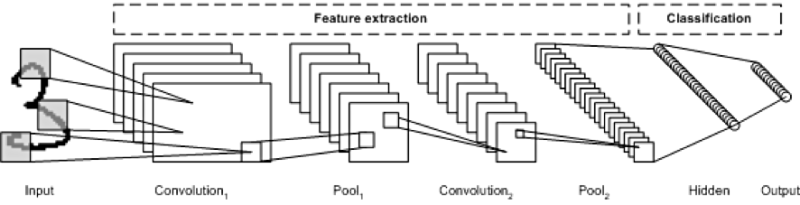

### 입력층
*   입력 이미지 데이터가 최초로 입력되는 계층입니다.
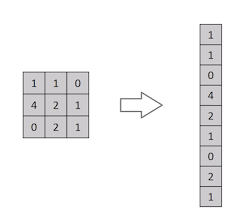

>   이미지 분석시 3*3배열은 1차원으로 펄쳐서 각 픽셀에 가중치를 곱하여 은닉층으로 전달하게 됩니다.

*   이미지는 높이, 너비, 채널의 값을 갖는 3차원 데이터입니다. (채널 = 1이면 gray scale / 3이면 RGB scale)
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSh5BCvXOY7nkkRu4qwy0onq-t6SVza4oy4KA&usqp=CAU" width="600" height="400"/>

### 합성곱층
*   입력 데이터에서 특성을 추출하는 역할을 수행합니다.
*   입력 이미지가 들어왔을 때 이미지에 대한 특성을 감지하기 위해 **커널이나 필터** 를 사용합니다.
<img src="https://velog.velcdn.com/images%2Fcherria96%2Fpost%2Fc629ba0f-e392-44c9-bba6-21339c072b57%2FKakaoTalk_20210329_220228846.jpg" width="600" height="500"/>
*   커널/필터는 이미지의 모든 영역을 훑으면서 특성을 추출하게 되는데, 이렇게 추출된 결과물이 특성 맵입니다.
*   필터 사용시 스트라이드(stride)라는 지정된 간격에 따라 순차적으로 이동합니다.
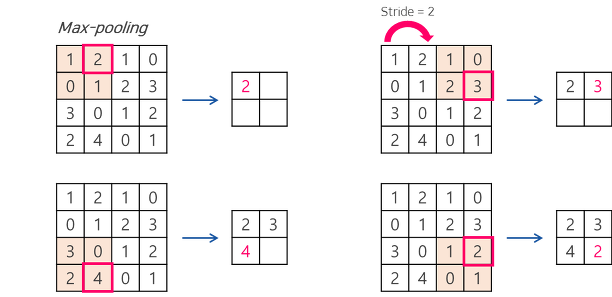

### 폴링층
*   합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시키고, 주요한 특성 벡터를 추출하여 학습을 효과적으로 할 수 있게 해줍니다.
*   목적 : 과대적합의 위험을 줄여주기 위해 파라미터 수를 줄이는 축소본을 만드는 것입니다.
1.   최대 폴링 (max pooling) : 대상 영역에서 최댓값을 추출
2.   평균 폴링 (average pooling) : 대상 영역에서 평균을 반환

### 완전연결층
*   합성곱층과 폴링층을 거치면서 차원이 축소된 특성 맵은 최종적으로 완전연결층으로 전달됩니다.
*   이미지는 3차원 벡터에서 1차원 벡터로 펄쳐지게 됩니다.
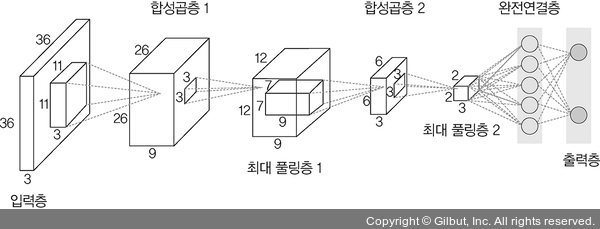

### 출력층
*   활성화 함수를 적용하여 가장 높은 확률 값을 갖는 레이블을 최종 값으로 선정합니다.

---

# Fashion_mnist 데이터셋 사용하여 합성곱 신경망 구현해보기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

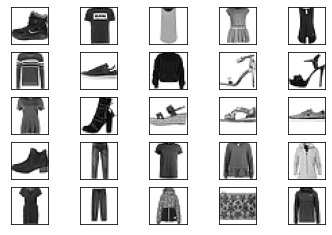

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
x_train, x_test = x_train/255.0 , x_test/255.0

model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5306 - accuracy: 0.8109
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4020 - accuracy: 0.8543
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3672 - accuracy: 0.8653
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3454 - accuracy: 0.8731
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3327 - accuracy: 0.8783
313/313 - 1s - loss: 0.3718 - accuracy: 0.8670 - 624ms/epoch - 2ms/step


[0.37182366847991943, 0.8669999837875366]

### 데이터 전처리

In [ ]:
x_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
x_test_final = x_test.reshape((-1,28, 28, 1)) / 255.

In [ ]:
model_with_conv = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D((2,2), strides=2),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

padding : 
합성공 연산을 수행하는 과정에서 커널/필터와 스트라이드의 작용으로 원본 이미지 크기가 줄어듭니다. 작아지는 것을 방지해주는 것이 패딩입니다.
쉽게, 원본 이미지에 0이라는 패딩 값을 채워 넣어 이미지를 확장한 후 합성곱 연산을 적용합니다.

>   valid : 유효한 영역만 출력되므로 출력 이미지 크기는 입력 이미지 크기보다 작습니다. <br />
same : 출력 이미지 크기가 입력 이미지 크기와 동일합니다.

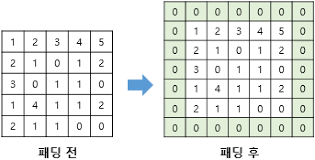

In [ ]:
model_with_conv.fit(x_train_final, y_train, epochs=5)
model_with_conv.evaluate(x_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.8363 - accuracy: 0.6878
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5329 - accuracy: 0.8048
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4608 - accuracy: 0.8332
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4193 - accuracy: 0.8474
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3916 - accuracy: 0.8567
313/313 - 1s - loss: 0.4056 - accuracy: 0.8539 - 728ms/epoch - 2ms/step


[0.40557554364204407, 0.8539000153541565]

## 사전  학습된 ResNet50 사용하기

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = ResNet50(include_top=True,
                 weights='imagenet',
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

In [ ]:
# 네트워크 구조 확인
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model.trainable = False
model = Sequential([model,
                    Dense(2,activation='sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_4 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = '/content/drive/MyDrive/DL_example/딥러닝 텐서플로 교과서/catanddog/train'
valid_dir = '/content/drive/MyDrive/DL_example/딥러닝 텐서플로 교과서/catanddog/validation'

train = ImageDataGenerator(
                rescale=1./255,
                rotation_range=10,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.1,
                zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

history = model.fit(train_generator,
                    epochs=10,
                    validation_data = valid_generator,
                    verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 11s - loss: 0.6931 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 11s/epoch - 870ms/step
Epoch 2/10
13/13 - 6s - loss: 0.6931 - accuracy: 0.5221 - val_loss: 0.6932 - val_accuracy: 0.4082 - 6s/epoch - 469ms/step
Epoch 3/10
13/13 - 6s - loss: 0.6932 - accuracy: 0.4753 - val_loss: 0.6932 - val_accuracy: 0.5000 - 6s/epoch - 475ms/step
Epoch 4/10
13/13 - 6s - loss: 0.6932 - accuracy: 0.4805 - val_loss: 0.6932 - val_accuracy: 0.4694 - 6s/epoch - 471ms/step
Epoch 5/10
13/13 - 6s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 6s/epoch - 465ms/step
Epoch 6/10
13/13 - 6s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000 - 6s/epoch - 470ms/step
Epoch 7/10
13/13 - 6s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000 - 6s/epoch - 470ms/step
Epoch 8/10
13/13 - 6s - loss: 0.6926 - accuracy: 0.5273 - val_l

In [ ]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


Text(0.5, 1.0, '오차')

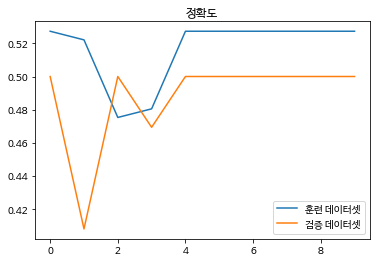

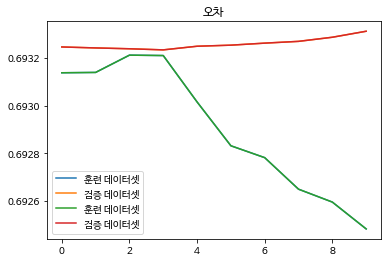

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

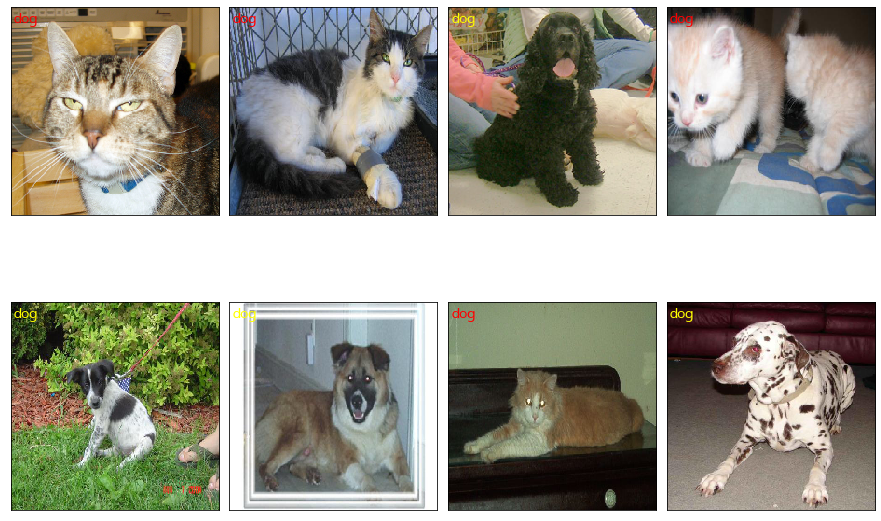

In [ ]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

---

In [ ]:
#pip install tensorflow_hub
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False),  
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data = valid_generator,
                    verbose=2)

Epoch 1/10
13/13 - 19s - loss: 0.5438 - accuracy: 0.7610 - val_loss: 0.1907 - val_accuracy: 0.9796 - 19s/epoch - 1s/step
Epoch 2/10
13/13 - 7s - loss: 0.1335 - accuracy: 0.9688 - val_loss: 0.0985 - val_accuracy: 0.9694 - 7s/epoch - 543ms/step
Epoch 3/10
13/13 - 7s - loss: 0.0702 - accuracy: 0.9870 - val_loss: 0.0624 - val_accuracy: 0.9796 - 7s/epoch - 542ms/step
Epoch 4/10
13/13 - 7s - loss: 0.0518 - accuracy: 0.9922 - val_loss: 0.0552 - val_accuracy: 0.9796 - 7s/epoch - 544ms/step
Epoch 5/10
13/13 - 7s - loss: 0.0400 - accuracy: 0.9922 - val_loss: 0.0503 - val_accuracy: 0.9796 - 7s/epoch - 548ms/step
Epoch 6/10
13/13 - 7s - loss: 0.0370 - accuracy: 0.9974 - val_loss: 0.0432 - val_accuracy: 0.9898 - 7s/epoch - 548ms/step
Epoch 7/10
13/13 - 7s - loss: 0.0395 - accuracy: 0.9896 - val_loss: 0.0493 - val_accuracy: 0.9694 - 7s/epoch - 535ms/step
Epoch 8/10
13/13 - 7s - loss: 0.0279 - accuracy: 0.9948 - val_loss: 0.0413 - val_accuracy: 0.9898 - 7s/epoch - 544ms/step
Epoch 9/10
13/13 - 7s - l

Text(0.5, 1.0, '오차')

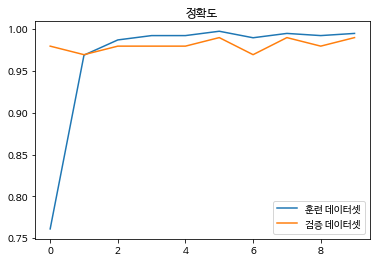

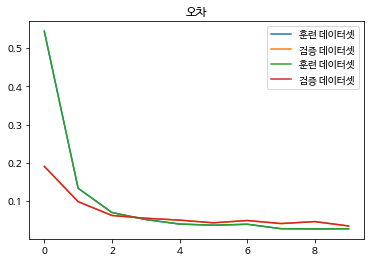

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

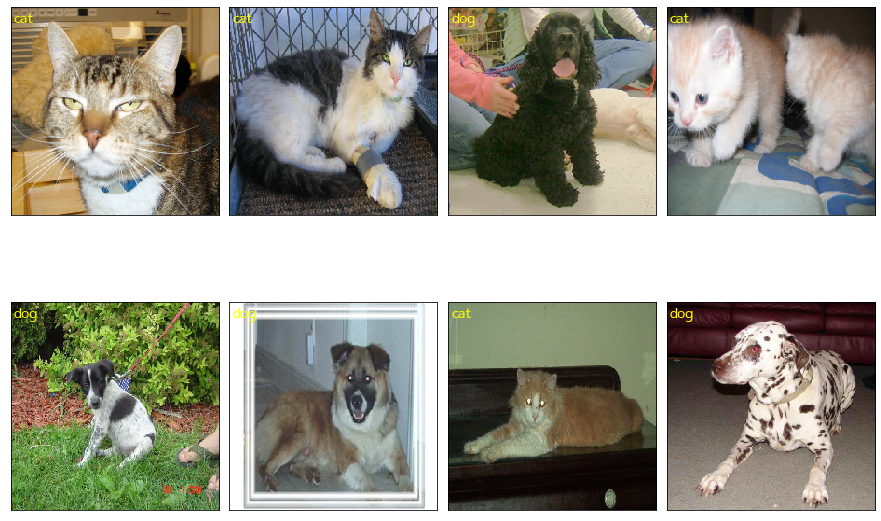

In [ ]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

---

### 특성맵 살펴보기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3), activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
    
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 64)        102464    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 64)        

In [ ]:
ins= model.inputs 
outs= model.layers[0].output  
feature_map= Model(inputs= ins, outputs= outs)  
feature_map.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer)  [(None, 100, 100, 3)]    0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


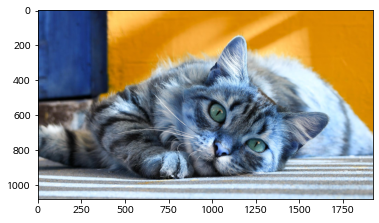

In [ ]:
img = cv2.imread("/content/drive/MyDrive/DL_example/딥러닝 텐서플로 교과서/catanddog/cat.jpg")
plt.imshow(img)

In [ ]:
img.shape

(100, 100, 3)

(1, 100, 100, 3)
(1, 96, 96, 32)


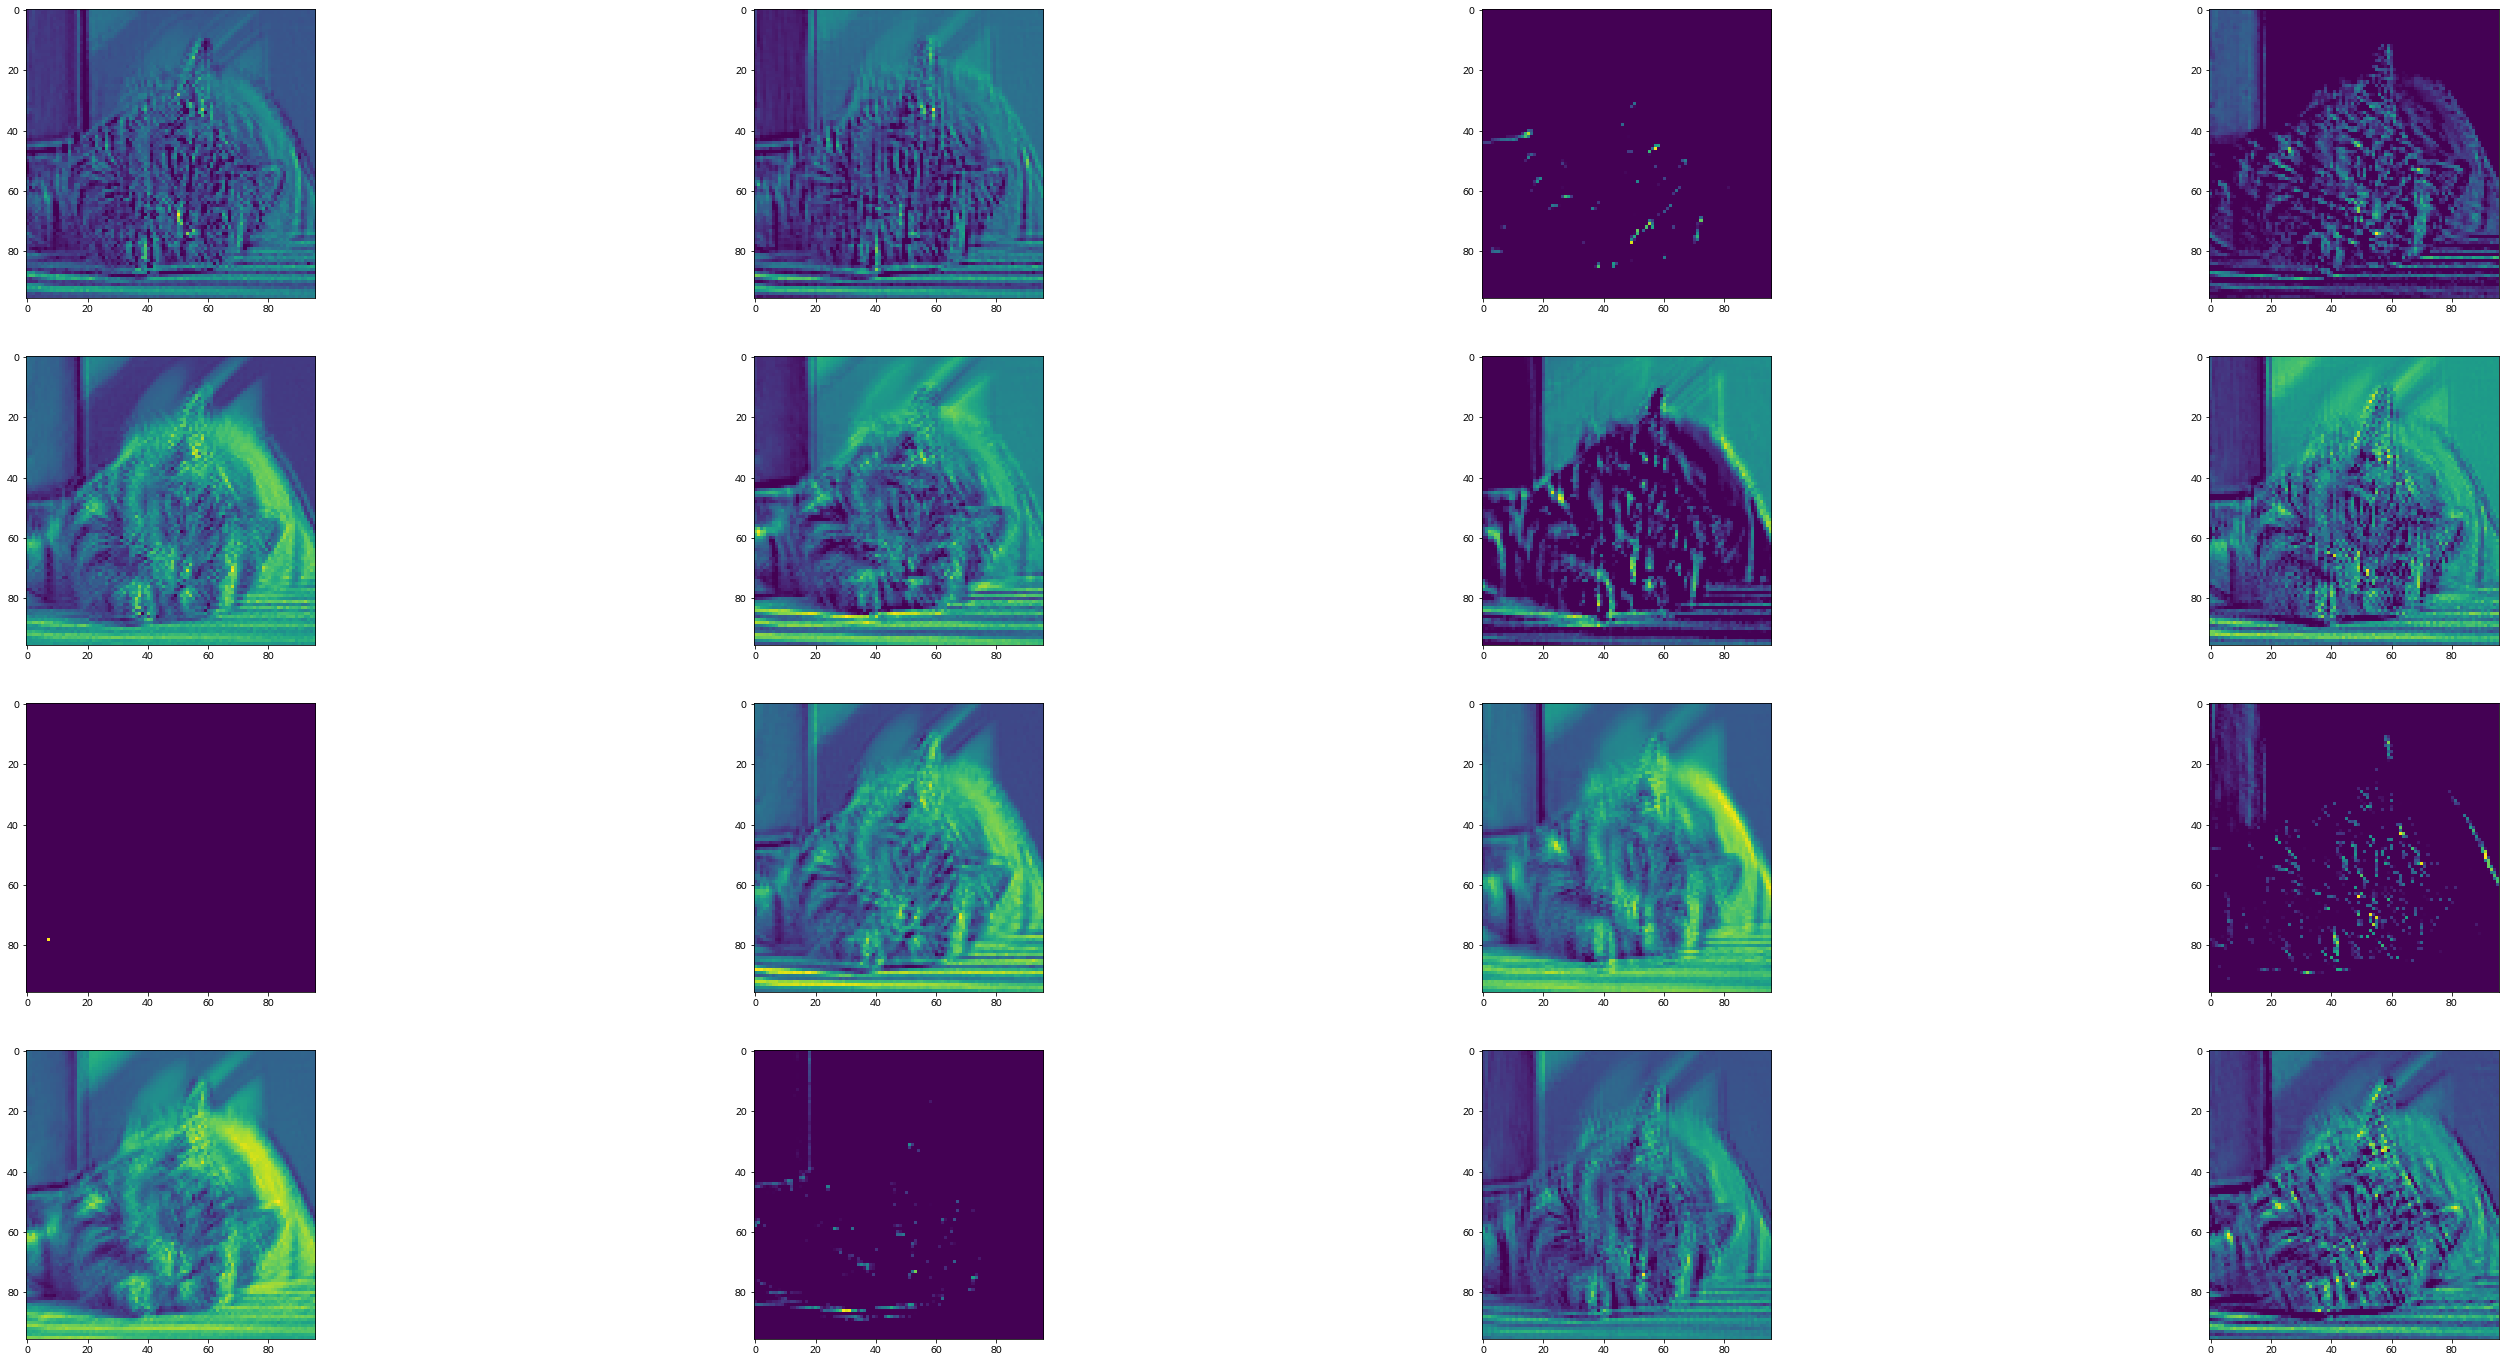

In [ ]:
img = cv2.resize(img, (100,100))
input_img = np.expand_dims(img, axis=0)
print(input_img.shape)

feature = feature_map.predict(input_img)
print(feature.shape)
fig = plt.figure(figsize=(50,50))
for i in range(16):
    ax = fig.add_subplot(8, 4, i+1)
    ax.imshow(feature[0,:,:,i])

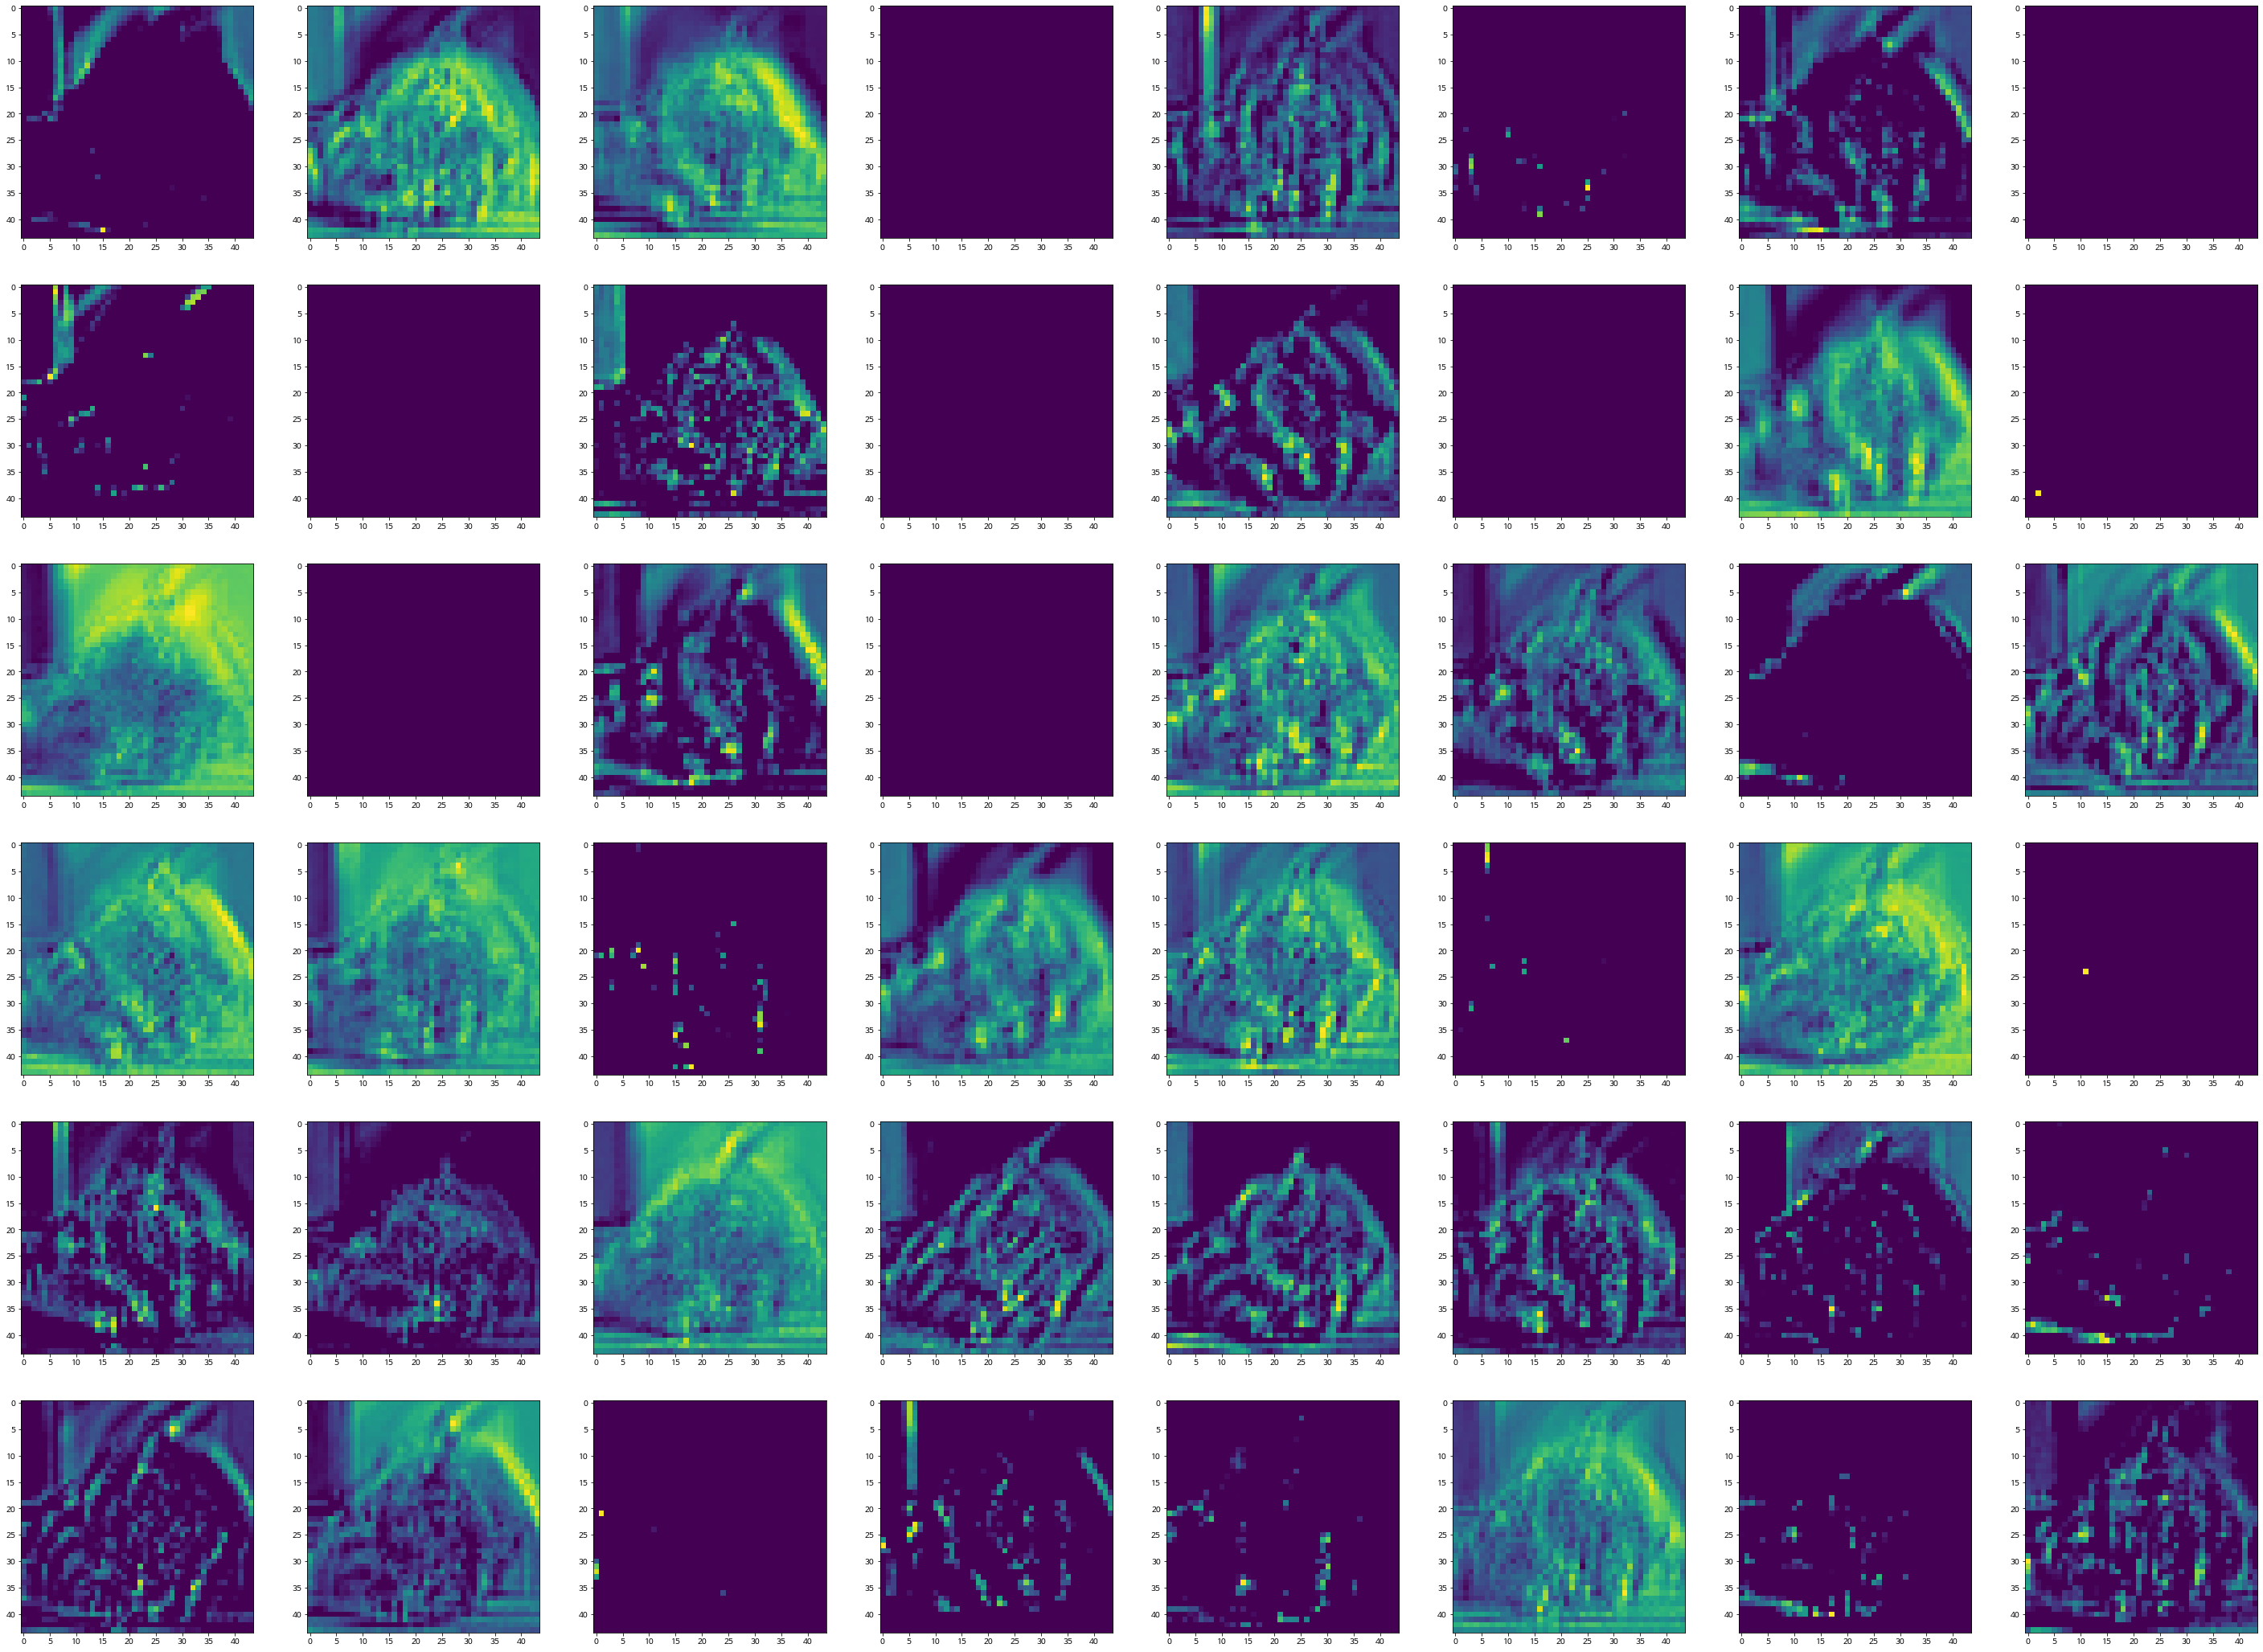

In [ ]:
ins= model.inputs 
outs= model.layers[2].output  
feature_map= Model(inputs= ins, outputs= outs)

img = cv2.imread("/content/drive/MyDrive/DL_example/딥러닝 텐서플로 교과서/catanddog/cat.jpg")
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)   

feature=feature_map.predict(input_img)        
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])

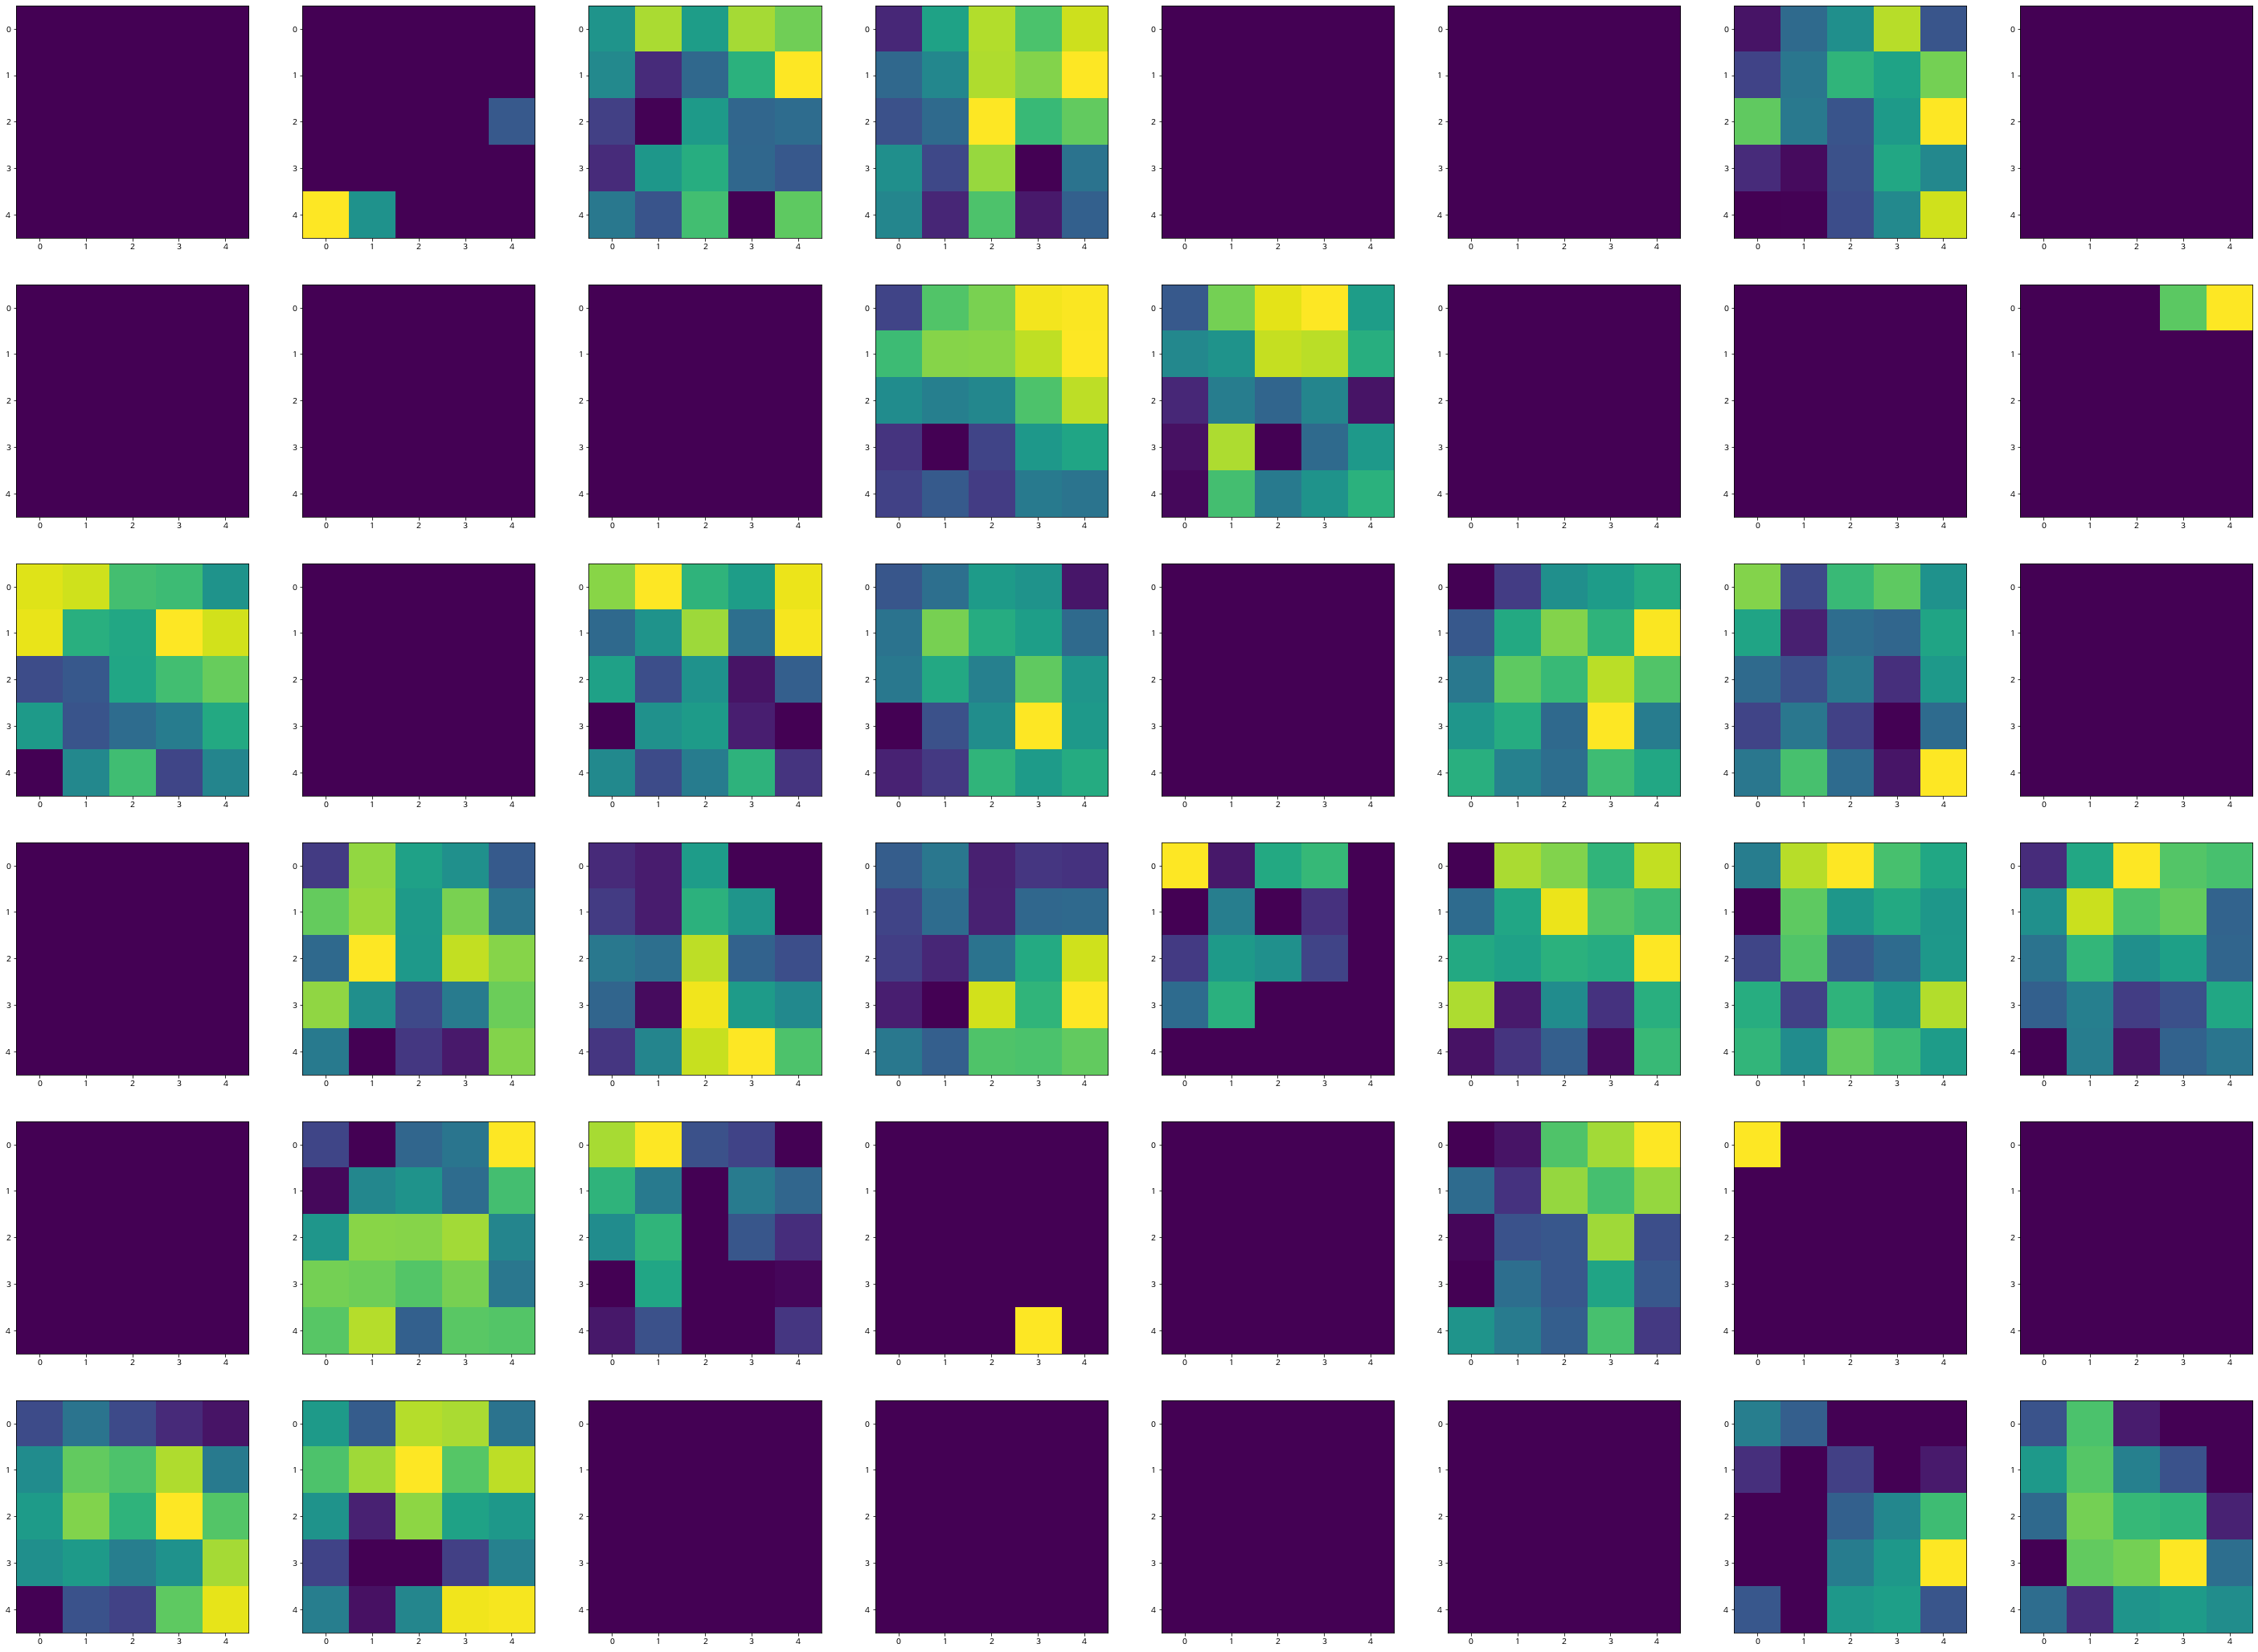

In [ ]:
ins= model.inputs 
outs= model.layers[6].output  
feature_map= Model(inputs= ins, outputs= outs)

img = cv2.imread("/content/drive/MyDrive/DL_example/딥러닝 텐서플로 교과서/catanddog/cat.jpg")                 
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)      
                      
feature=feature_map.predict(input_img)        
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])